<a href="https://colab.research.google.com/github/he-yilan/etude146A/blob/main/Une_%C3%89tude_Phon%C3%A9tique_sur_l'Acquisition_de_la_Langue_Fran%C3%A7aise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Une Étude Phonétique sur l'Acquisition de la Langue Française

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fractions

In [2]:
def divise(col):
  """
  Convertir une réponse à une liste utilisant les virgules pour la séparer
  """
  arr = []
  for i in range(len(col)):
    reponse = col[i]
    reponse_arr = reponse.split(',')
    arr.extend(reponse_arr)
  return arr

In [3]:
def compter(arr):
  """
  Compter combien de fois une réponse apparait
  """
  resultat = []
  resultat_cle = []
  resultat_dict = {}

  # créer les clés
  for i in range(len(arr)):
    if not arr[i] in resultat_cle:
      resultat_cle.append(arr[i])

  # créer la dictionnaire
  for j in resultat_cle:
    resultat_dict[j] = 0

  # ajouter les valeurs 
  for cle in resultat_dict:
    for k in range(len(arr)): 
      if arr[k] == cle:
        resultat_dict[cle] += 1

  return resultat_dict

## Les Apprenants de Français L2


In [4]:
L2_donnees = pd.read_csv('/content/drive/MyDrive/French_146A/étude/données/L2 - Sheet1.csv')
L2_donnees

,Sujet,Age,Period_Apprentissage,L1,L2,Vocabulaire,Grammaire,Prononciation,Lecture,Ecoute,Methodes,Bon,EE,HH,Liaison
0,1,19,5/24,"coreen,anglais","japonais,chinois mandarin,espagnol,francais",4,3,5,4,5,"0,1,2,3,4,5,6,7",1,0,0,2/7
1,2,19,7,"chinois mandarin,anglais","chinois mandarin,francais,japonais",4,3,5,1,2,"2,3,4,5,6,7",1,0,0,6/7
2,3,20,6,"espagnol,anglais","anglais,francais",2,5,3,4,1,"1,3,4",1,0,0,5/7
3,4,23,2,"anglais,suedois","francais,espagnol,hindi,portugais",2,3,3,5,5,"1,3,4,6,7",0,0,0,6/7
4,5,16,15,slovaque,"anglais,francais",2,3,1,4,5,"2,4",1,0,1,6/7


In [5]:
methodes_choix = ["Exercices à l'écrit", # 0
                 "Exercices à l'oral", # 1
                 "Lire", # 2
                 "Regarder", # 3
                 "Écouter", # 4
                 "Écrire", # 5
                 "Parler à l'oral", # 6
                 "Parler à l'écrit"] # 7
ages = L2_donnees.Age.tolist()
periodes = L2_donnees.Period_Apprentissage.tolist()
L1_col = L2_donnees.L1.tolist()
L2_col = L2_donnees.L2.tolist()
vocab = L2_donnees.Vocabulaire.tolist()
grammaire = L2_donnees.Grammaire.tolist()
prononciation = L2_donnees.Prononciation.tolist()
lecture = L2_donnees.Lecture.tolist()
ecoute = L2_donnees.Ecoute.tolist()
methodes = L2_donnees.Methodes.tolist()
bon = L2_donnees.Bon.tolist()
EE = L2_donnees.EE.tolist()
HH = L2_donnees.HH.tolist()
liaison = L2_donnees.Liaison.tolist()
nombre_sujets_L2 = len(L2_donnees)

### Les Âges

In [6]:
print(ages)
print('médiane: ', np.median(ages))
print('moyenne: ', np.mean(ages))
print('étendue:', np.ptp(ages))

[19, 19, 20, 23, 16]
médiane:  19.0
moyenne:  19.4
étendue: 7


In [7]:
ages_dict = compter(ages)
ages_dict

{19: 2, 20: 1, 23: 1, 16: 1}

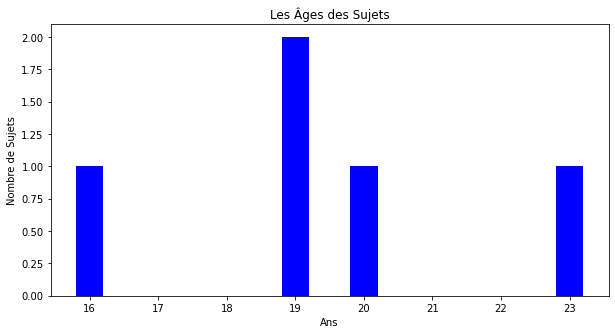

In [9]:
fig = plt.figure(figsize = (10, 5))

plt.bar(list(ages_dict.keys()), list(ages_dict.values()), color ='blue',
        width = 0.4)
 
plt.xlabel("Ans")
plt.ylabel("Nombre de Sujets")
plt.title("Les Âges des Sujets")
plt.show()

### Les Périodes d'Apprentissage

In [10]:
periodes[0] = float(fractions.Fraction(periodes[0]))
periodes = [float(i) for i in periodes]
periodes_triée = sorted(periodes)
periodes

[0.20833333333333334, 7.0, 6.0, 2.0, 15.0]

In [11]:
print('médiane: ', np.median(periodes))
print('moyenne: ', np.mean(periodes))
print('étendue:', np.ptp(periodes))

médiane:  6.0
moyenne:  6.041666666666666
étendue: 14.791666666666666


In [12]:
periodes_dict = compter(periodes_triée)
periodes_dict 

{0.20833333333333334: 1, 2.0: 1, 6.0: 1, 7.0: 1, 15.0: 1}

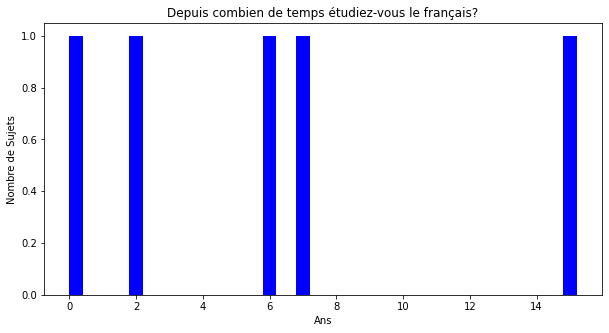

In [13]:
fig = plt.figure(figsize = (10, 5))

plt.bar(list(periodes_dict.keys()), list(periodes_dict.values()), color ='blue',
        width = 0.4)
 
plt.xlabel("Ans")
plt.ylabel("Nombre de Sujets")
plt.title("Depuis combien de temps étudiez-vous le français?")
plt.show()

### Langues Maternelles

In [14]:
L1_arr = divise(L1_col)
L2_arr = divise(L2_col)

In [15]:
langues1_dict = compter(L1_arr)
langues2_dict = compter(L2_arr)

In [16]:
langues1_dict

{'coreen': 1,
 'anglais': 4,
 'chinois mandarin': 1,
 'espagnol': 1,
 'suedois': 1,
 'slovaque': 1}

In [17]:
langues2_dict.pop('francais')
langues2_dict

{'japonais': 2,
 'chinois mandarin': 2,
 'espagnol': 2,
 'anglais': 2,
 'hindi': 1,
 'portugais': 1}

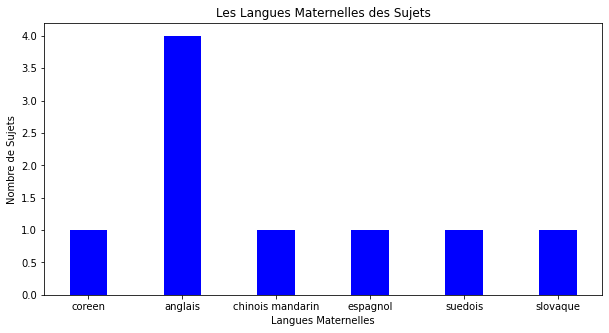

In [18]:
fig = plt.figure(figsize = (10, 5))

plt.bar(list(langues1_dict.keys()), list(langues1_dict.values()), color ='blue',
        width = 0.4)
 
plt.xlabel("Langues Maternelles")
plt.ylabel("Nombre de Sujets")
plt.title("Les Langues Maternelles des Sujets")
plt.show()

### Les Langues que les Sujets Étudient en Plus du Français


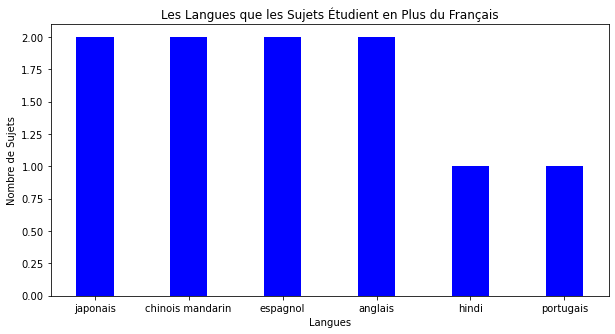

In [19]:
fig = plt.figure(figsize = (10, 5))

plt.bar(list(langues2_dict.keys()), list(langues2_dict.values()), color ='blue',
        width = 0.4)
 
plt.xlabel("Langues")
plt.ylabel("Nombre de Sujets")
plt.title("Les Langues que les Sujets Étudient en Plus du Français")
plt.show()

### Les Priorités

In [20]:
vocab_m = np.mean(vocab)
grammaire_m = np.mean(grammaire)
prononciation_m = np.mean(prononciation)
lecture_m = np.mean(lecture)
ecoute_m = np.mean(ecoute)

In [21]:
priorites_cle = ['Vocabulaire', 'Grammaire', 'Prononciation', 'Lecture', 'Ecoute']
priorites_dict = {'Vocabulaire': np.mean(vocab), 'Grammaire': np.mean(grammaire), 'Prononciation': np.mean(prononciation), 'Lecture': np.mean(lecture), 'Ecoute': np.mean(ecoute)}
priorites_dict
# convertir à une liste de tuples s'il y a du temps

{'Vocabulaire': 2.8,
 'Grammaire': 3.4,
 'Prononciation': 3.4,
 'Lecture': 3.6,
 'Ecoute': 3.6}

### Les Méthodes d'Étudier

In [22]:
methodes

['0,1,2,3,4,5,6,7', '2,3,4,5,6,7', '1,3,4', '1,3,4,6,7', '2,4']

In [23]:
methodes_arr = divise(methodes)
methodes_arr = [int(i) for i in methodes_arr]
methodes_indice_arr = [*set(methodes_arr)]

In [24]:
methodes_dict = compter(methodes_arr)
methodes_dict

{0: 1, 1: 3, 2: 3, 3: 4, 4: 5, 5: 2, 6: 3, 7: 3}

In [25]:
for i in range(len(methodes_dict)):
  methodes_dict[methodes_choix[i]] = methodes_dict[i]
  del methodes_dict[i]

In [26]:
methodes_dict

{"Exercices à l'écrit": 1,
 "Exercices à l'oral": 3,
 'Lire': 3,
 'Regarder': 4,
 'Écouter': 5,
 'Écrire': 2,
 "Parler à l'oral": 3,
 "Parler à l'écrit": 3}

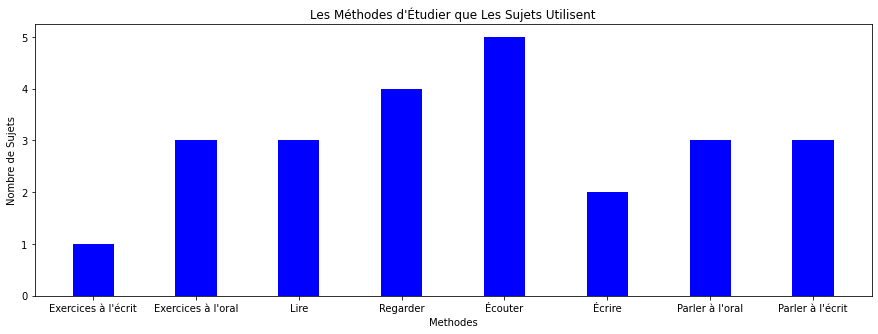

In [27]:
fig = plt.figure(figsize = (15, 5))

plt.bar(list(methodes_dict.keys()), list(methodes_dict.values()), color ='blue',
        width = 0.4)
 
plt.xlabel("Methodes")
plt.ylabel("Nombre de Sujets")
plt.title("Les Méthodes d'Étudier que Les Sujets Utilisent")
plt.show()

### Les Résultats d'Épreuve de Prononciation

In [28]:
bon_somme = sum(bon)
EE_somme = sum(EE)
HH_somme = sum(HH)
liaison_float = [float(fractions.Fraction(x)) for x in liaison]
liaison_float

[0.2857142857142857,
 0.8571428571428571,
 0.7142857142857143,
 0.8571428571428571,
 0.8571428571428571]

In [29]:
sommes = [bon_somme, EE_somme, HH_somme]

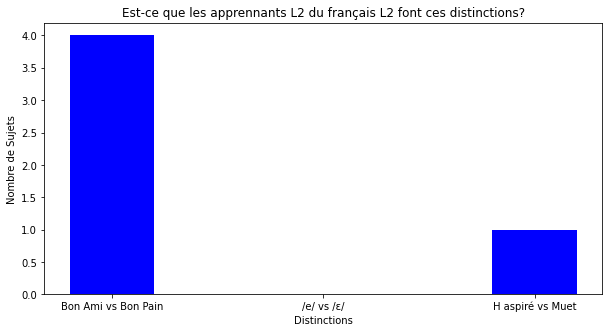

In [30]:
fig = plt.figure(figsize = (10, 5))

plt.bar(['Bon Ami vs Bon Pain', '/e/ vs /ɛ/', 'H aspiré vs Muet'], sommes, color ='blue',
        width = 0.4)
 
plt.xlabel("Distinctions")
plt.ylabel("Nombre de Sujets")
plt.title("Est-ce que les apprennants L2 du français L2 font ces distinctions?")
plt.show()

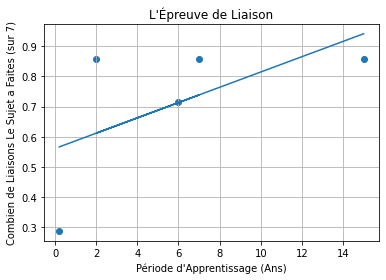

In [35]:
x = periodes
y = liaison_float

(m, b) = np.polyfit(x, y, 1)
yp = np.polyval([m, b], x)

plt.plot(x, yp)
plt.grid(True)
plt.scatter(x, y)
plt.xlabel("Période d'Apprentissage (Ans)")
plt.ylabel("Combien de Liaisons Le Sujet a Faites (sur 7)")
plt.title("L'Épreuve de Liaison")
plt.savefig("liaison", dpi = 100)
plt.show()

## Les Locuteurs de Français L1

In [ ]:
L1_donnees = pd.read_csv('/content/drive/MyDrive/French_146A/étude/données/L1 - Sheet1.csv')
L1_donnees

,Sujet,Age,Bon,EE,HH,Liaison
0,F,18,1,1,0,7/7
1,Q,22,1,1,1,6/7


In [ ]:
nombre_sujets_L1 = len(L1_donnees)
bon_L1 = L1_donnees.Bon.tolist()
EE_L1 = L1_donnees.EE.tolist()
HH_L1 = L1_donnees.HH.tolist()
bon_somme_L1 = sum(bon_L1)
EE_somme_L1 = sum(EE_L1)
HH_somme_L1 = sum(HH_L1)
sommes_L1 = [bon_somme_L1, EE_somme_L1, HH_somme_L1]
liaison_L1 = L1_donnees.Liaison.tolist()
liaison_float_L1 = [float(fractions.Fraction(x)) for x in liaison_L1]
liaison_float_L1

[1.0, 0.8571428571428571]

In [ ]:
pourcentage_L1 = [i / nombre_sujets_L1 for i in sommes_L1]
pourcentage_L2 = [i / nombre_sujets_L2 for i in sommes]

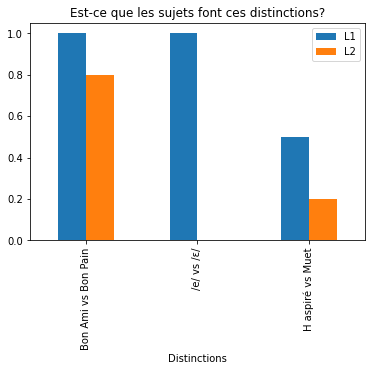

In [ ]:
df = pd.DataFrame({
    'Distinctions': ['Bon Ami vs Bon Pain', '/e/ vs /ɛ/', 'H aspiré vs Muet'],
    'L1': pourcentage_L1,
    'L2': pourcentage_L2
})

df.plot(x="Distinctions", y=["L1", "L2"], kind="bar", title = "Est-ce que les sujets font ces distinctions?")